# Analysis - exp45

- Consistency check DQN parameters

('score', 'learning_rate', 'epsilon') (0.8610649179784786, 0.001111, 0.05)

In [2]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "run_{}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

In [3]:
path = "/Users/qualia/Code/azad/data/wythoff/exp45/"
exp_45 = load_data(path, run_index=(1, 20))

In [4]:
print(len(exp_45))

20


In [5]:
pprint(exp_45[1].keys())
pprint(exp_45[1]['score'][:20])

dict_keys(['file', 'episode', 'loss', 'score'])
[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]


# Plots

Timecourse

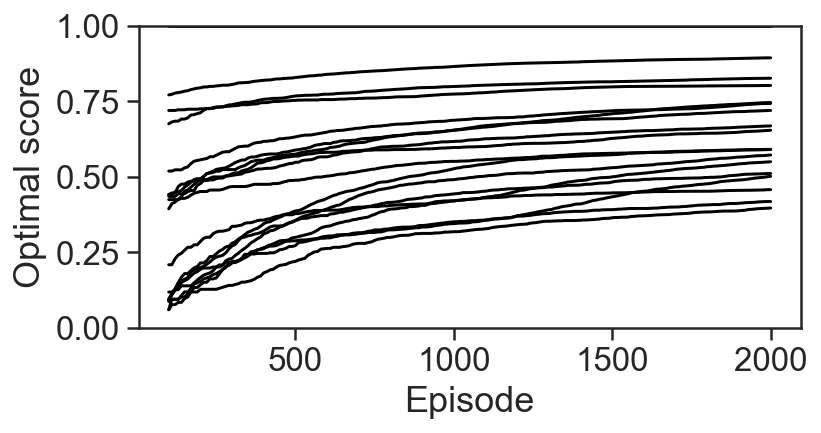

In [6]:
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_45):
    if mon is not None:
        _ = plt.plot(mon['episode'], mon['score'], color='black')
        _ = plt.ylim(0, 1)
_ = plt.ylabel("Optimal score")
_ = plt.tight_layout()                                    
_ = plt.xlabel("Episode")

Histograms of final values

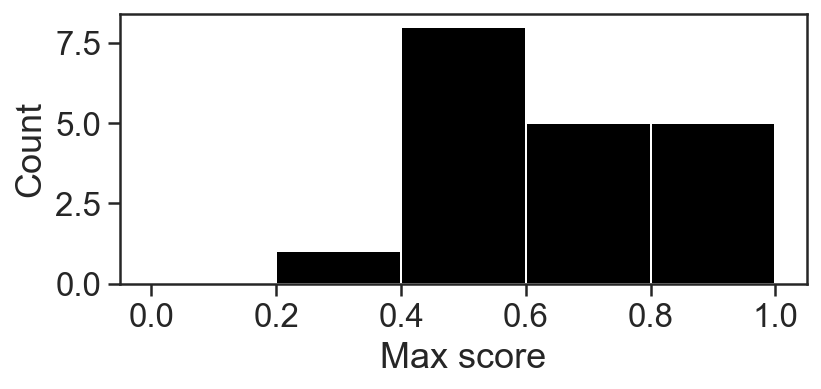

In [8]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_45):
    if mon is not None:
        data.append(np.max(mon['score']))                

_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Max score")
_ = plt.ylabel("Count")
_ = plt.tight_layout()      

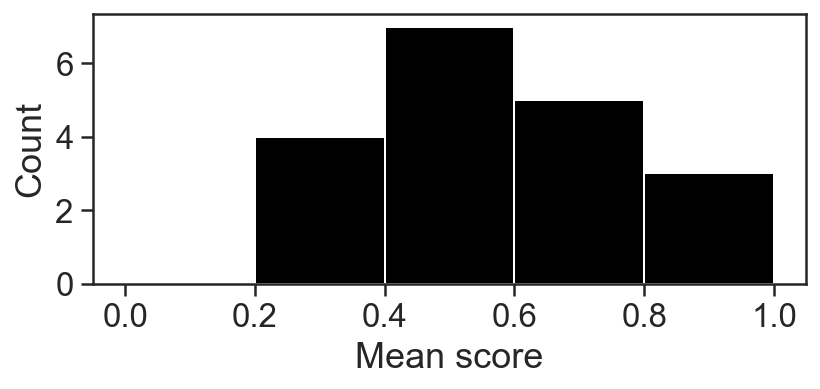

In [9]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_45):
    if mon is not None:
        data.append(np.mean(mon['score']))                

_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Mean score")
_ = plt.ylabel("Count")
_ = plt.tight_layout()                                    